In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])  
   

## We know the cost function is:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \$$

### where:
$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$\
is the cost for a single data point

### Which is:
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \$$

### where m is the number of training examples in the data set and:

$$
\begin{align*}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\ \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\ \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\ 
\end{align*}
$$

In [54]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [55]:
def compute_cost(X,y,theta):
    m = X.shape[0]
    z = np.dot(X,theta[0])+theta[1]
    func = sigmoid(z)
    loss = -y*np.log(func)-(1-y)*np.log(1-func)
    cost = sum(loss)/m
    return cost

compute_cost(X_train,y_train,[np.array([1,1]),-3])

0.36686678640551745

### For gradient descent we know,
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \ \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \ 
\end{align*}$$

In [56]:
def gradient(X,y,theta):
    m,n = X.shape
    deriv =[np.zeros(n),0]
    func = sigmoid(np.dot(X,theta[0])+theta[1]) - y
    deriv[0] = np.dot(X.T,func)/m
    deriv[1] = np.sum(func)/m
    return deriv

gradient(X_train,y_train,[[2.,3.],1.])

[array([0.49833339, 0.49883943]), 0.49861806546328574]

In [60]:
def gradient_descent(X,y,theta,alpha,iters,compute_cost,gradient):
    J_history = np.zeros((iters,1))

    for iter in range(iters):

        J = compute_cost(X,y,theta)

        J_history[iter] = J

        deriv = gradient(X,y,theta)
        
        theta[0] = theta[0] - alpha * deriv[0]
        
        theta[1] = theta[1] - alpha * deriv[1]
        
    return theta[0],theta[1],J_history

theta=[np.zeros(X_train.shape[1]),0.]
alpha = 0.1
iterations = 10000


w_fin, b_fin, j_hist = gradient_descent(X_train,y_train,theta,alpha,iterations,compute_cost,gradient)

In [61]:
w_fin,b_fin

(array([5.28123029, 5.07815608]), -14.222409982019839)

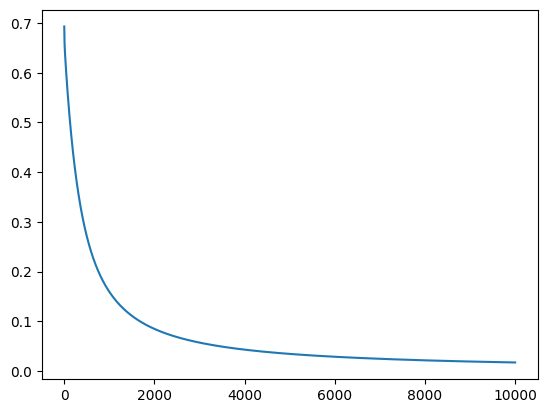

In [62]:
plt.plot(j_hist[:]);